# Distribution Plots

Let's discuss some plots that allow us to visualize the distribution of a data set. These plots are:

* distplot
* jointplot
* pairplot
* rugplot
* kdeplot

___
## Imports

In [4]:
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

## Data
Seaborn comes with built-in data sets!

In [5]:
tips = sns.load_dataset('tips')

In [6]:
type(tips)

pandas.core.frame.DataFrame

Describe the data set

In [7]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Lets go ahead and discuss our first plot called distribution plot or distplot

## distplot

The distplot shows the distribution of a univariate set of observations. Univariate just means one variable.

/Users/Vipin_Mehta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


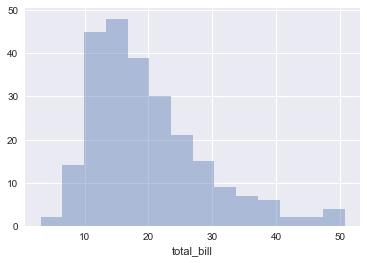

In [8]:
sns.distplot(tips['total_bill'], kde=False)
# Lets see the distribution of total bill

There is a histogram and a line that shows the Kernel Density Estimation or KDE. We will discuss KDE later. To remove the kde layer and just have the histogram use:<br>
The histogram above shows how is the total bill distributed. The 'y-axis' shows the count and the x-axis shows different bins for dollar amounts.<br>
The above distribution shows that most of your total bills are in the range of \$10 - $20.<br>
Also, the bill amounts start to fade way at higher amounts<br>
If you want to zoom in get a more granular distribution, you can increase the bin size.<br>
Choosing a bill value too high will result in plotting of a lot of points and it becomes difficult to capture an overall trend.

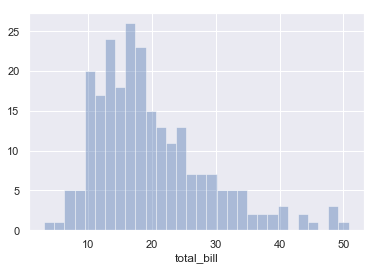

In [18]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

If you want to analyze a bivariant data i.e. analyze data involving two variables, you can use a joint plot.

## jointplot

jointplot() allows you to basically match up two distplots for bivariate data. With your choice of what **kind** parameter to compare with i.e. **kind** helps specify how do you want to compare the two variables






/Users/Vipin_Mehta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/Vipin_Mehta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


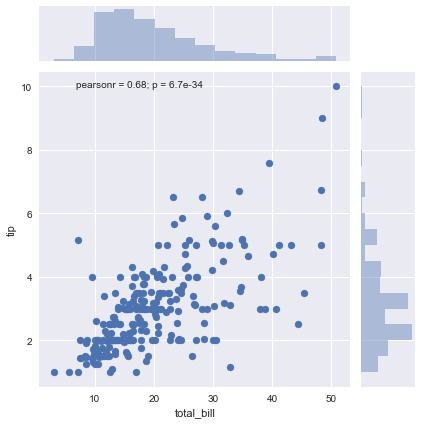

In [9]:
sns.jointplot(x='total_bill',y='tip',data=tips)

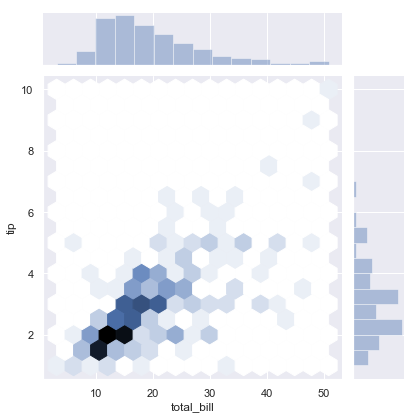

In [23]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

Shows the distribution of total_bill against the tip amount. There are 3 parts to the plot. The center part shows a scatterplot between the two variables and establishes a relationship between them. The horizontal plot above the scatter plot shows the distribution of the total_bill variable - same as what we saw in distplot. The vertical plot shows the distribution of the secnd variables - tips.<br>
You can observe from the scatter plot that as the total bill goes up, so does the tip which makes sense.

You can use the 'kind' parameter to control the behavior of plot. Example, we can specify hex plot using the a'hex' argument. The hexagon becomes darker as more point fall under it.

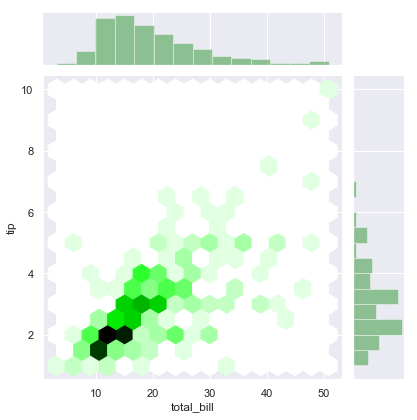

In [24]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex',color='green')

Another value that we can specify in the 'kind' argument is the 'reg' argument for regression analysis. This will look a lot like the scatterplot but Seaborn will draw a regression line on it.<br>
Now we have not discussed regression analysis topic in <b>machine learning</b> yet. We will do that in future and will come back to this. For now, think of it as a relationship between the two variables.

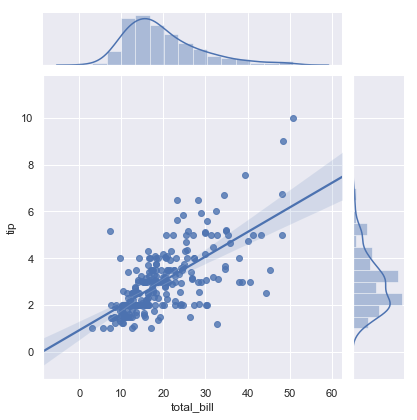

In [25]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

Finally, lets consier one more type called 'kde'. It shows Seaborn to plot a 2D KDE which essentially shows the density of where these 2 variables match up the most.

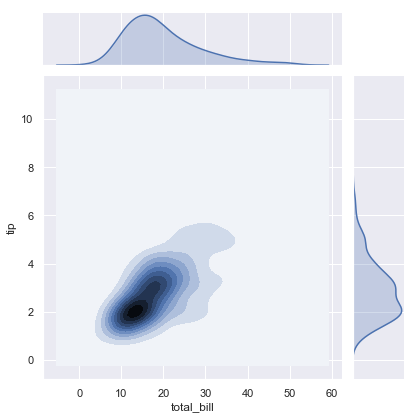

In [26]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

## pairplot

pairplot will plot pairwise relationships across an entire dataframe (for the numerical columns) and supports a color hue argument (for categorical columns). 

pairplot is going to essentially invoke jointplot to establish pairwise relationships between all the columns atleast the numerical ones.<br>
And because it is going to it for all the columns, we just have to specify the data frame as an argument to pairplot

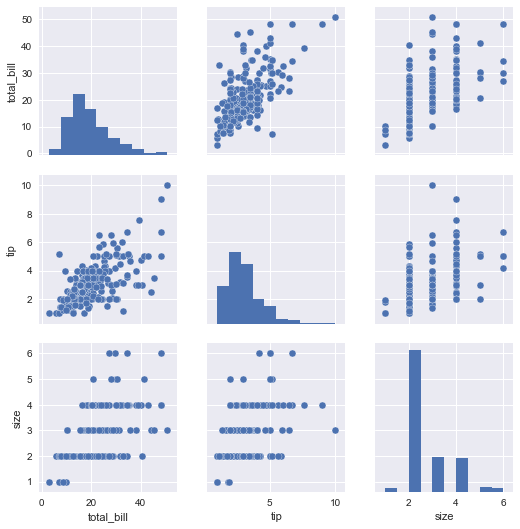

In [12]:
sns.pairplot(tips)

For the diagonal columns in the above matrix where we have the same variable on both the axis, a scatterplot wont be of much use since it will essentially be a straight line.<br>
In such cases, Seaborn provides a univariate histogram instead.

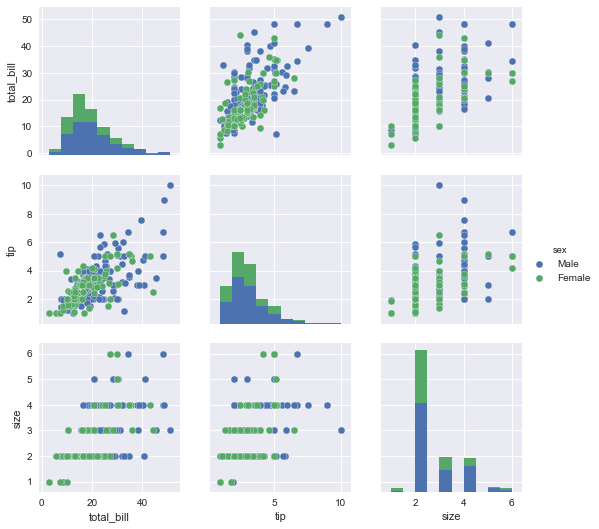

In [13]:
sns.pairplot(tips,hue='sex',diag_kind='hist')

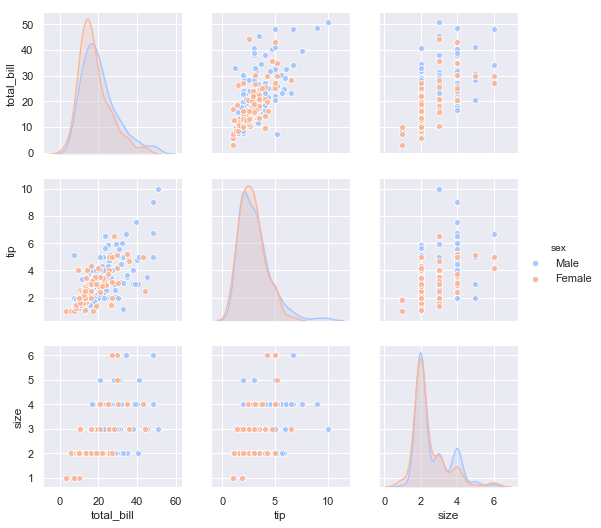

In [28]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

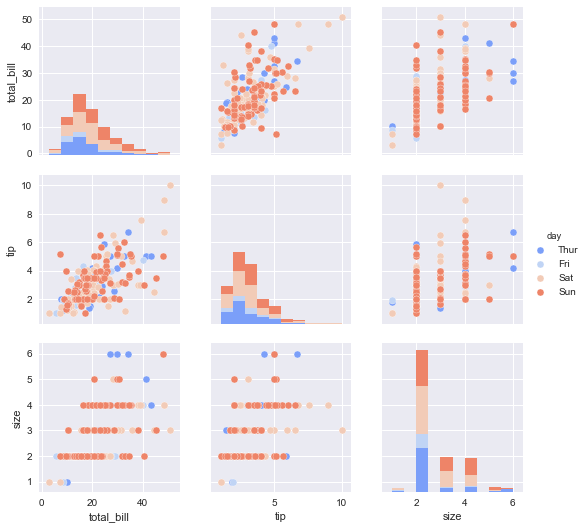

In [15]:
sns.pairplot(tips,hue='day',palette='coolwarm')

## rugplot

rugplots are actually a very simple concept, they just draw a dash mark for every point on a univariate distribution. They are the building block of a KDE plot:

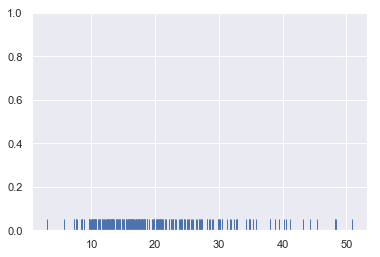

In [33]:
sns.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example:<br>
Gaussian distribution is one of the most common continuous probability distribution. How did every one do on their test, ppl's ages or heights. A lot of things tend to follow normal distribution

(0, 1)

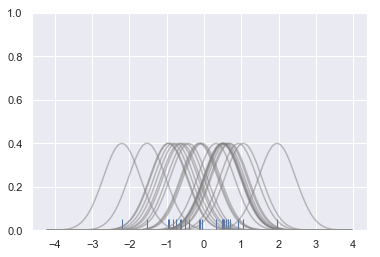

In [34]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

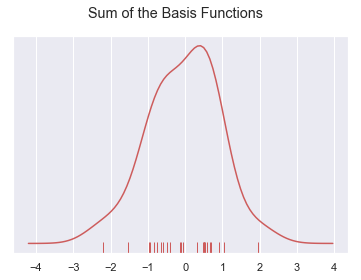

In [35]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

So with our tips dataset:

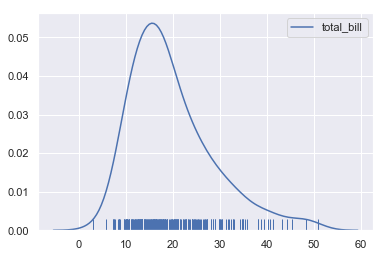

In [36]:
sns.kdeplot(tips['total_bill'])
sns.rugplot(tips['total_bill'])

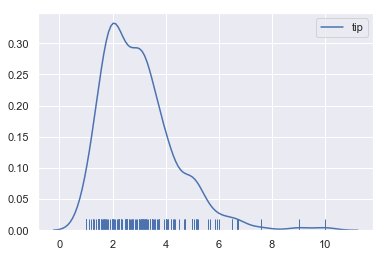

In [37]:
sns.kdeplot(tips['tip'])
sns.rugplot(tips['tip'])

# Categorical Data Plots

Now let's discuss using seaborn to plot categorical data! There are a few main plot types for this:

* factorplot
* boxplot
* violinplot
* stripplot
* swarmplot
* barplot
* countplot

Let's go through examples of each!

Categorical plots are typically used to compare the trend of a categorical column against a numerical column or another categorical column.

In [38]:
import seaborn as sns
%matplotlib inline

In [39]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## barplot and countplot

These very similar plots allow you to get aggregate data off a categorical feature in your data. **barplot** is a general plot that allows you to aggregate the categorical data based off some function, by default the mean.<br>
You can think of this as a visualization of a groupby action.

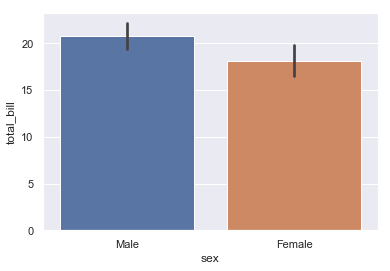

In [40]:
sns.barplot(x='sex',y='total_bill',data=tips)

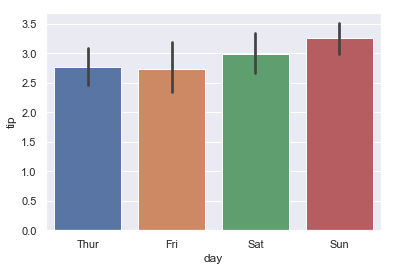

In [46]:
sns.barplot(x='day',y='tip',data=tips)

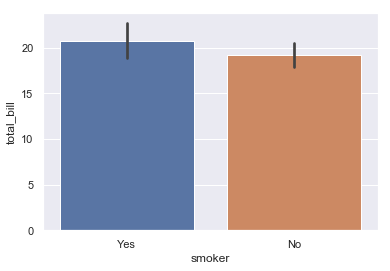

In [48]:
sns.barplot(x='smoker',y='total_bill',data=tips)

In [10]:
import numpy as np

You can change the estimator object to your own function, that converts a vector to a scalar:

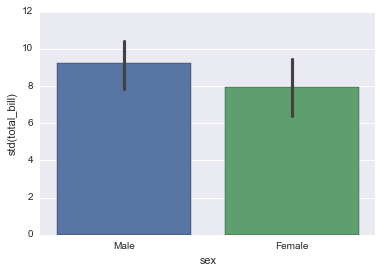

In [11]:
sns.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)

### countplot

This is essentially the same as barplot except the estimator is explicitly counting the number of occurrences. Which is why we only pass the x value:

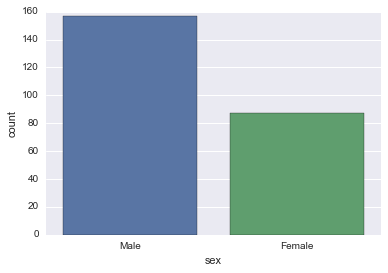

In [13]:
sns.countplot(x='sex',data=tips)

## boxplot and violinplot

boxplots and violinplots are used to shown the distribution of categorical data. A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be using a method that is a function of the inter-quartile range.

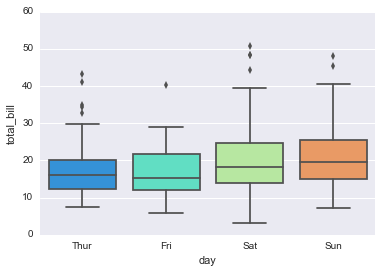

In [22]:
sns.boxplot(x="day", y="total_bill", data=tips,palette='rainbow')

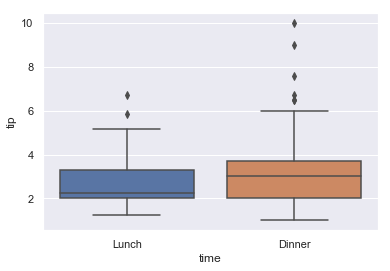

In [49]:
sns.boxplot(x='time', y='tip', data=tips)

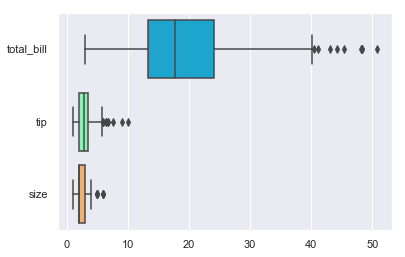

In [50]:
# Can do entire dataframe with orient='h'
sns.boxplot(data=tips,palette='rainbow',orient='h')

We can really get fancy by adding an argument 'hue' which splits the boxplot to reveal the distribution across the hue variable.

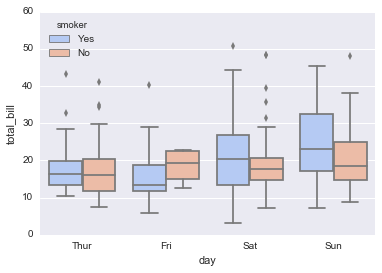

In [26]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="coolwarm")

People on Friday tend to have a larger bill if they are not a smoker vs if they are a smoker

### violinplot
A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

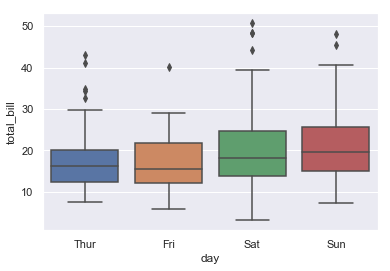

In [54]:
sns.boxplot(x="day", y="total_bill", data=tips)

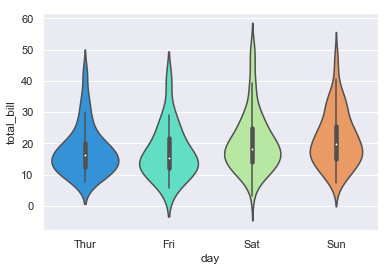

In [55]:
sns.violinplot(x="day", y="total_bill", data=tips,palette='rainbow')

As you can see, a voilin plot gives a lot more information about the distribution of the data points themselves.

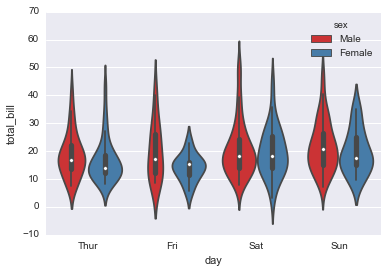

In [37]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',palette='Set1')

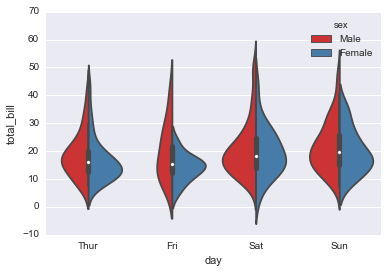

In [36]:
sns.violinplot(x="day", y="total_bill", data=tips,hue='sex',split=True,palette='Set1')

In [53]:
sns.violinplot(x="sex", y="total_bill", data=tips,hue='day',split=True,palette='Set1')

ValueError: There must be exactly two hue levels to use `split`.'

## stripplot and swarmplot (skip)
The stripplot will draw a scatterplot where one variable is categorical. A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

The swarmplot is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they dont overlap. This gives a better representation of the distribution of values, although it does not scale as well to large numbers of observations (both in terms of the ability to show all the points and in terms of the computation needed to arrange them).

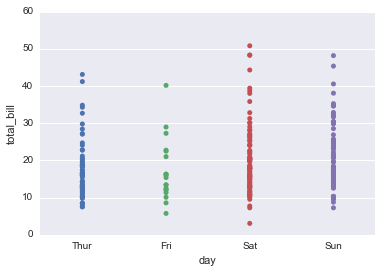

In [38]:
sns.stripplot(x="day", y="total_bill", data=tips)

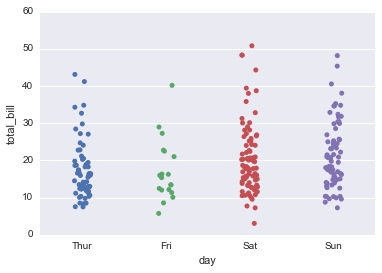

In [39]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True)

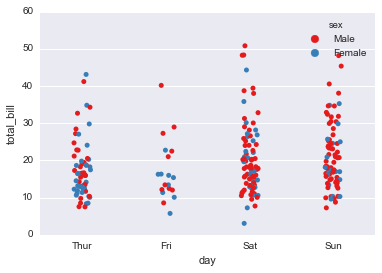

In [42]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1')

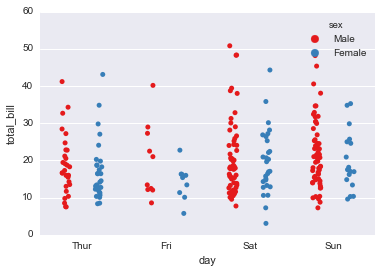

In [43]:
sns.stripplot(x="day", y="total_bill", data=tips,jitter=True,hue='sex',palette='Set1',split=True)

Some ppl like to combine the idea of the stripplot with the voilin plot. Thats where we can use swarmplot.

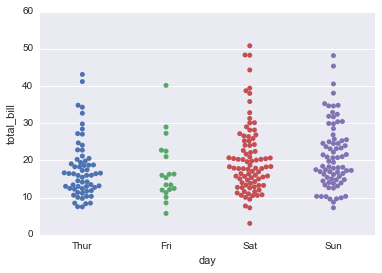

In [44]:
sns.swarmplot(x="day", y="total_bill", data=tips)

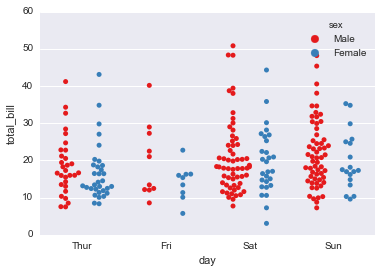

In [47]:
sns.swarmplot(x="day", y="total_bill",hue='sex',data=tips, palette="Set1", split=True)

### Combining Categorical Plots (skip)

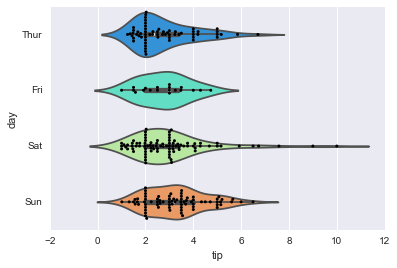

In [61]:
sns.violinplot(x="tip", y="day", data=tips,palette='rainbow')
sns.swarmplot(x="tip", y="day", data=tips,color='black',size=3)

## factorplot (skip)

factorplot is the most general form of a categorical plot. It can take in a **kind** parameter to adjust the plot type:

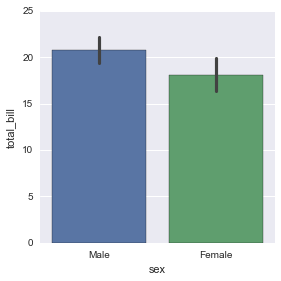

In [15]:
sns.factorplot(x='sex',y='total_bill',data=tips,kind='bar')

# Matrix Plots

Matrix plots allow you to plot data as color-encoded matrices and can also be used to indicate clusters within the data (later in the <b>machine learning</b> section we will learn how to formally cluster data).

Let's begin by exploring seaborn's heatmap and clutermap:

In [58]:
import seaborn as sns
%matplotlib inline

In [59]:
flights = sns.load_dataset('flights')

In [60]:
tips = sns.load_dataset('tips')

Explain the table

In [61]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Explain the table

In [62]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


## Heatmap

In order for a heatmap to work properly, your data should already be in a matrix form, the sns.heatmap function basically just colors it in for you.<br>
Matrix form essentially means that the index name and the column name shoudl amtch up such that the cell value indicates something that is relevant to both of them.<br>
There are 2 ways of doing it - correlation and pivot tables

In [63]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [64]:
# Matrix form for correlation data
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


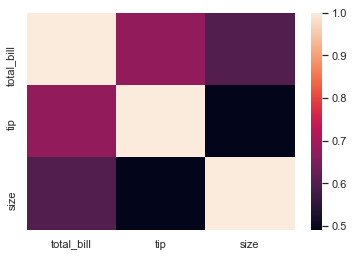

In [65]:
sns.heatmap(tips.corr())

Colors in those values based on some gradient scale. The strength of the color reflects the degree of correlation. Note that correlation can be both negative or positive.

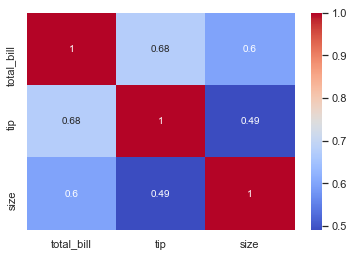

In [66]:
sns.heatmap(tips.corr(),cmap='coolwarm',annot=True)

Or for the flights data:

In [67]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


We need a way to convert one of the columns to rows so that we can show its correlation against the rest of the columns.

In [23]:
flights.pivot_table(values='passengers',index='month',columns='year')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


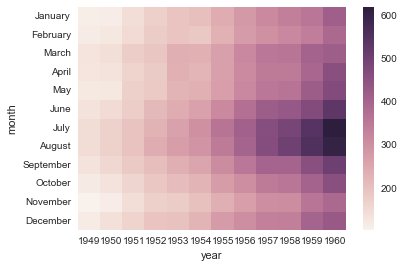

In [24]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

Looking at the heatmap, I can easily tell which month of which year had the maximum number of passengers.

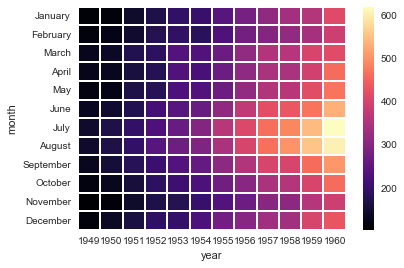

In [30]:
sns.heatmap(pvflights,cmap='magma',linecolor='white',linewidths=1)

## clustermap (skip)

The clustermap uses hierarchal clustering to produce a clustered version of the heatmap. For example:

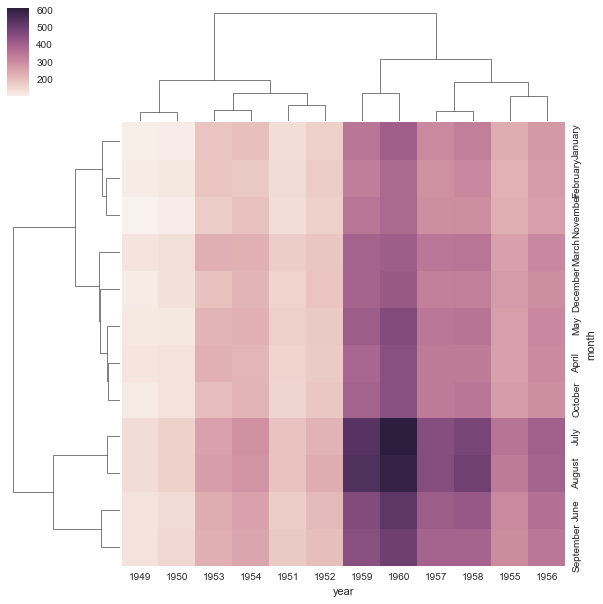

In [31]:
sns.clustermap(pvflights)

Notice now how the years and months are no longer in order, instead they are grouped by similarity in value (passenger count). That means we can begin to infer things from this plot, such as August and July being similar (makes sense, since they are both summer travel months)

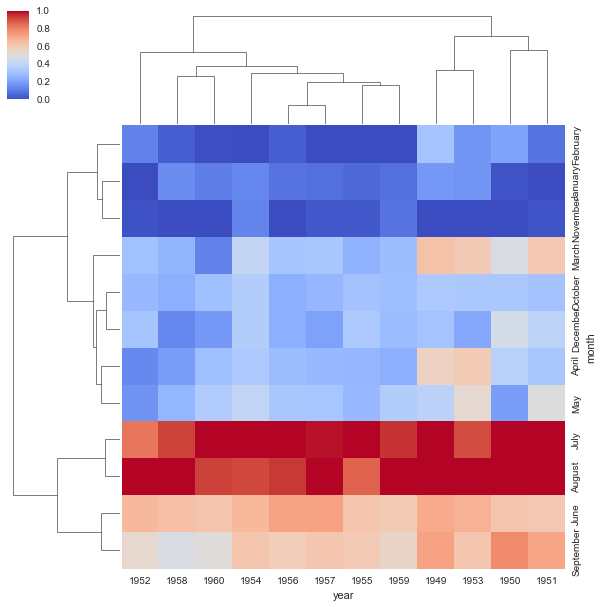

In [34]:
# More options to get the information a little clearer like normalization
sns.clustermap(pvflights,cmap='coolwarm',standard_scale=1)

# Grids

Grids are general types of plots that allow you to map plot types to rows and columns of a grid, this helps you create similar plots separated by features.

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
iris = sns.load_dataset('iris')

In [28]:
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## PairGrid

Pairgrid is a subplot grid for plotting pairwise relationships in a dataset.

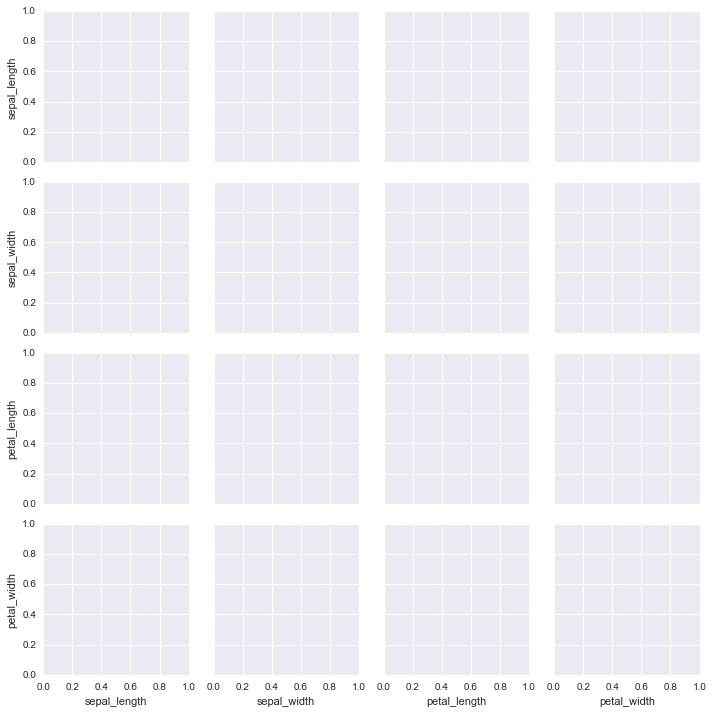

In [25]:
# Just the Grid
sns.PairGrid(iris)

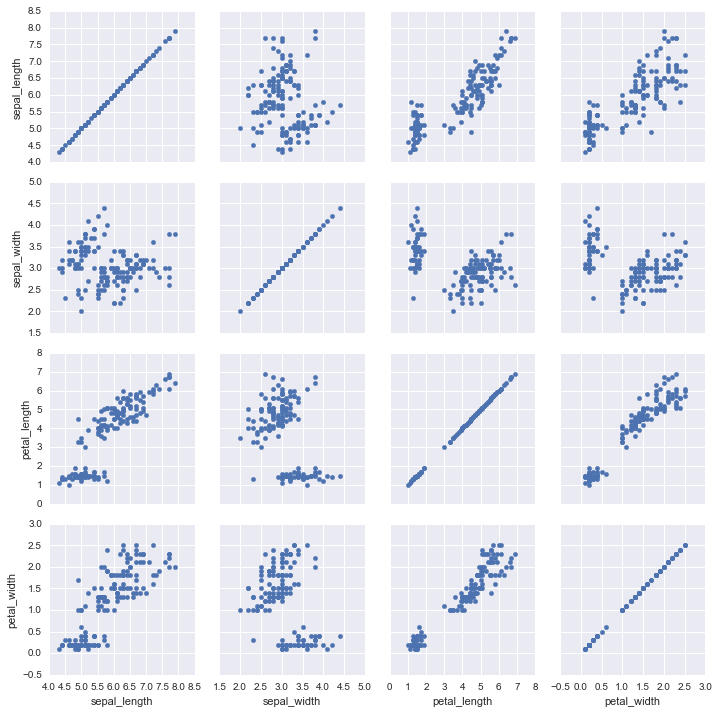

In [26]:
# Then you map to the grid
g = sns.PairGrid(iris)
g.map(plt.scatter)

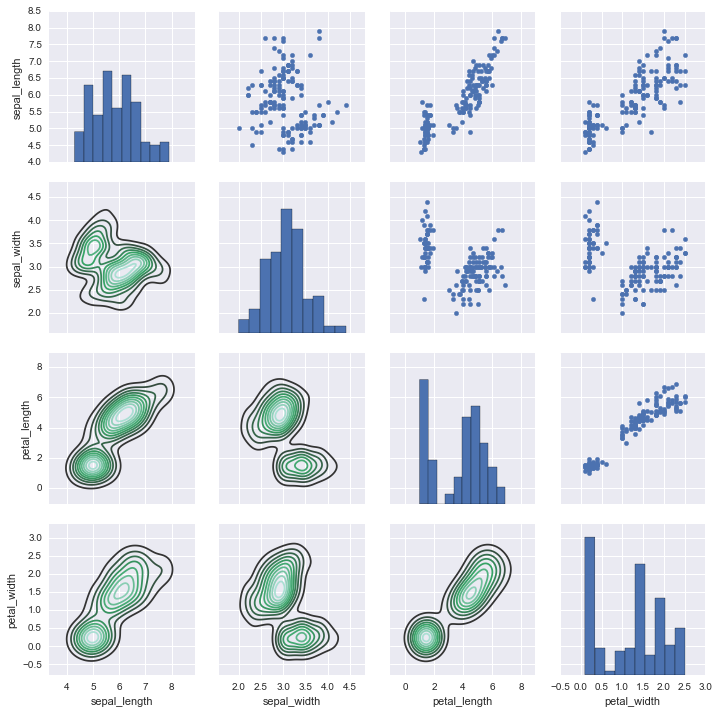

In [30]:
# Map to upper,lower, and diagonal
g = sns.PairGrid(iris)
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

## pairplot (skip)

pairplot is a simpler version of PairGrid (you'll use quite often)

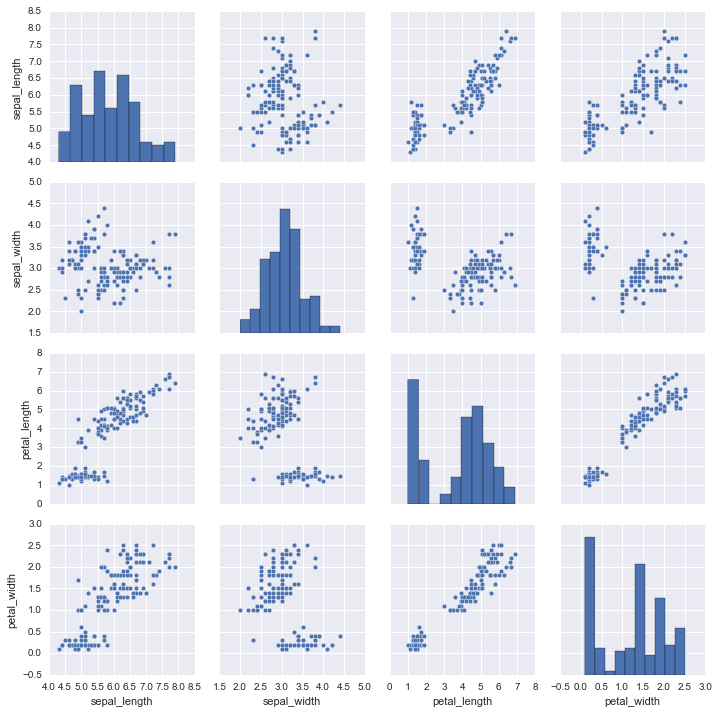

In [31]:
sns.pairplot(iris)

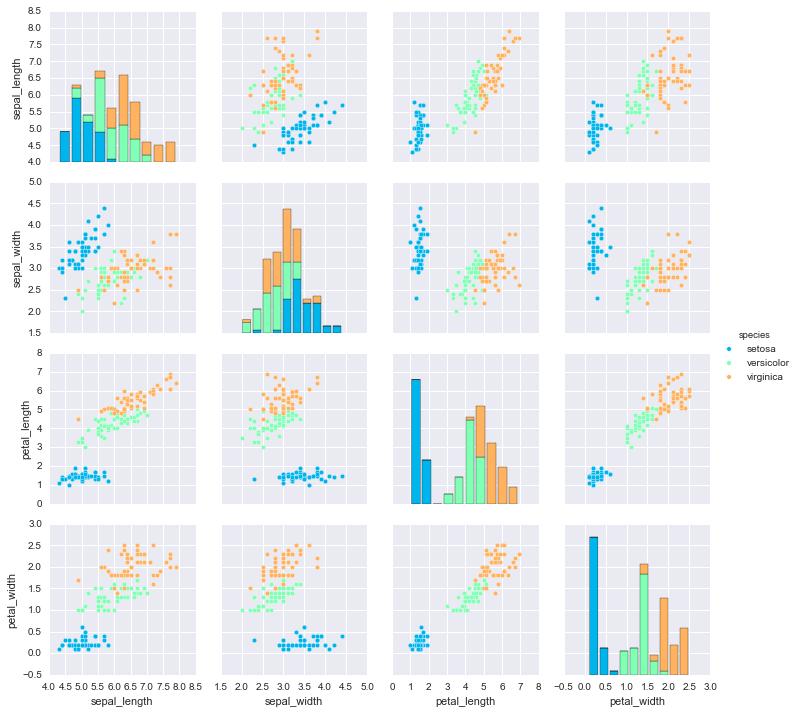

In [33]:
sns.pairplot(iris,hue='species',palette='rainbow')

## Facet Grid (skip)

FacetGrid is the general way to create grids of plots based off of a feature:

In [34]:
tips = sns.load_dataset('tips')

In [35]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


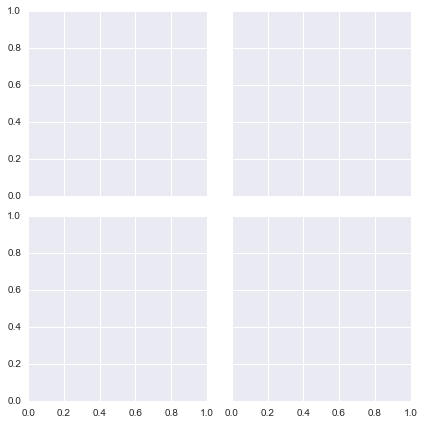

In [36]:
# Just the Grid
g = sns.FacetGrid(tips, col="time", row="smoker")

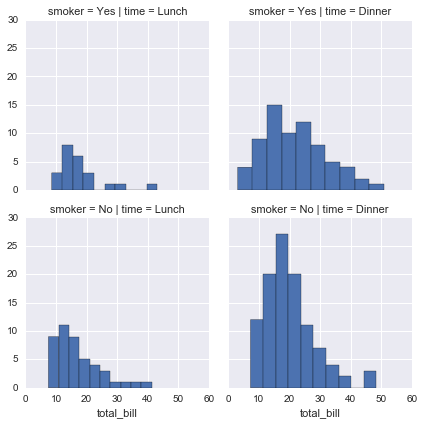

In [37]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

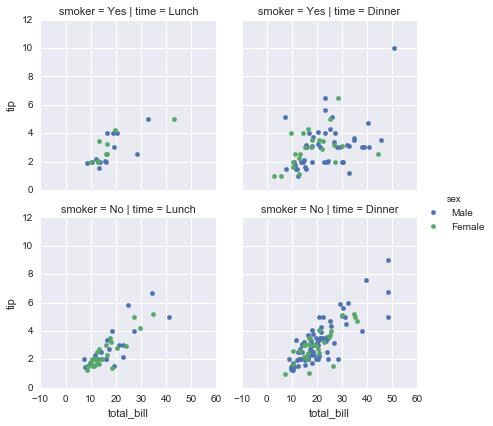

In [42]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
# Notice hwo the arguments come after plt.scatter call
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

## JointGrid (skip)

JointGrid is the general version for jointplot() type grids, for a quick example:

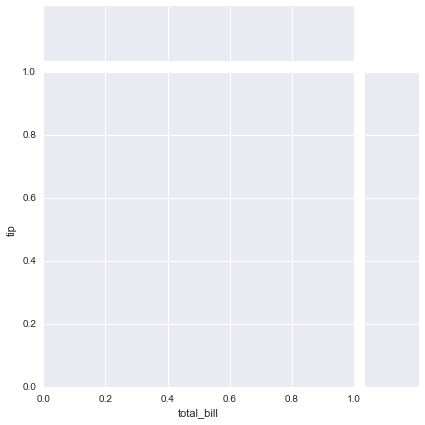

In [43]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


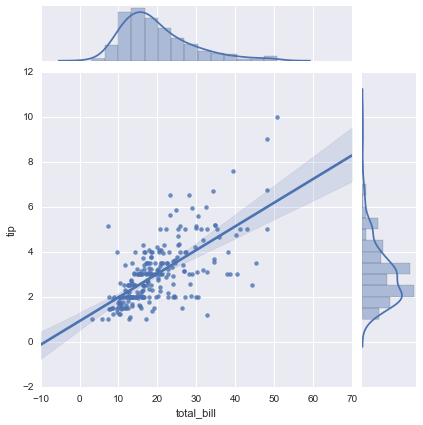

In [45]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.distplot)

Reference the documentation as necessary for grid types, but most of the time you'll just use the easier plots discussed earlier.

# Regression Plots

Seaborn has many built-in capabilities for regression plots, however we won't really discuss regression until the <b>machine learning</b> section of the course, so we will only cover the **lmplot()** function for now.

**lmplot** allows you to display linear models, but it also conveniently allows you to split up those plots based off of features, as well as coloring the hue based off of features.

Let's explore how this works:

In [1]:
import seaborn as sns
%matplotlib inline

In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## lmplot()

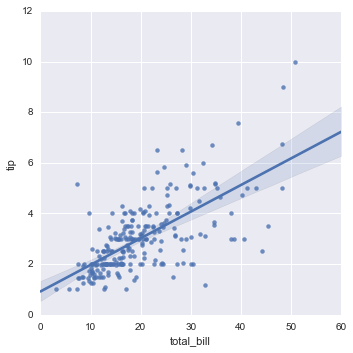

In [5]:
sns.lmplot(x='total_bill',y='tip',data=tips)

We essentially get a scatterplot between total bill and tip.<br>
We can also specify the hue to see the distribution wrt some categorical data

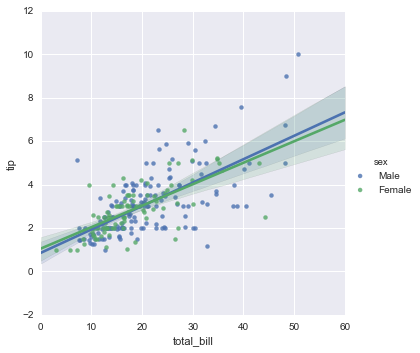

In [6]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

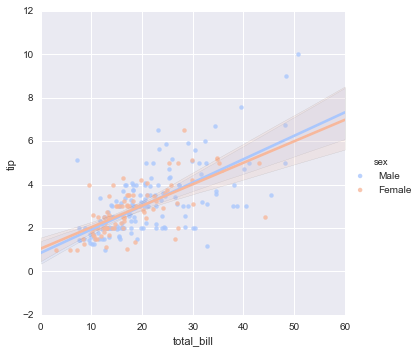

In [13]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm')

### Working with Markers

lmplot kwargs get passed through to **regplot** which is a more general form of lmplot(). regplot has a scatter_kws parameter that gets passed to plt.scatter. So you want to set the s parameter in that dictionary, which corresponds (a bit confusingly) to the squared markersize. In other words you end up passing a dictionary with the base matplotlib arguments, in this case, s for size of a scatter plot. In general, you probably won't remember this off the top of your head, but instead reference the documentation.

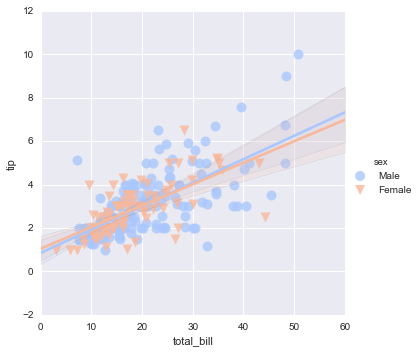

In [16]:
# http://matplotlib.org/api/markers_api.html
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm',
           markers=['o','v'],scatter_kws={'s':100})

## Using a Grid

We can add more variable separation through columns and rows with the use of a grid. Just indicate this with the col or row arguments:

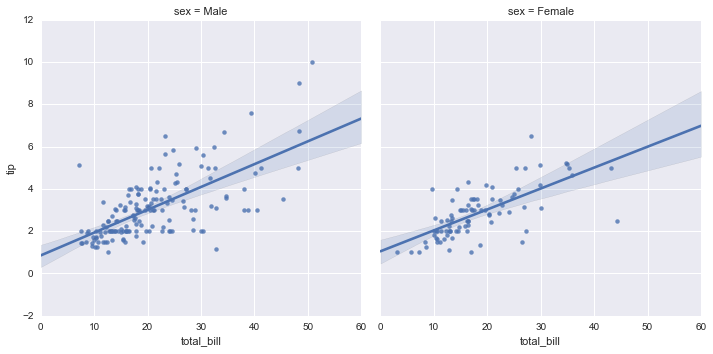

In [28]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex')

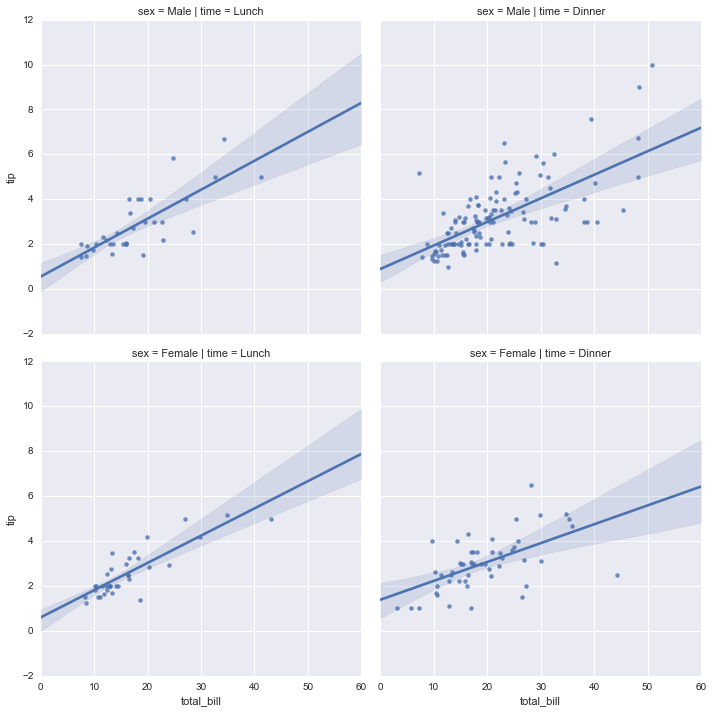

In [30]:
sns.lmplot(x="total_bill", y="tip", row="sex", col="time",data=tips)

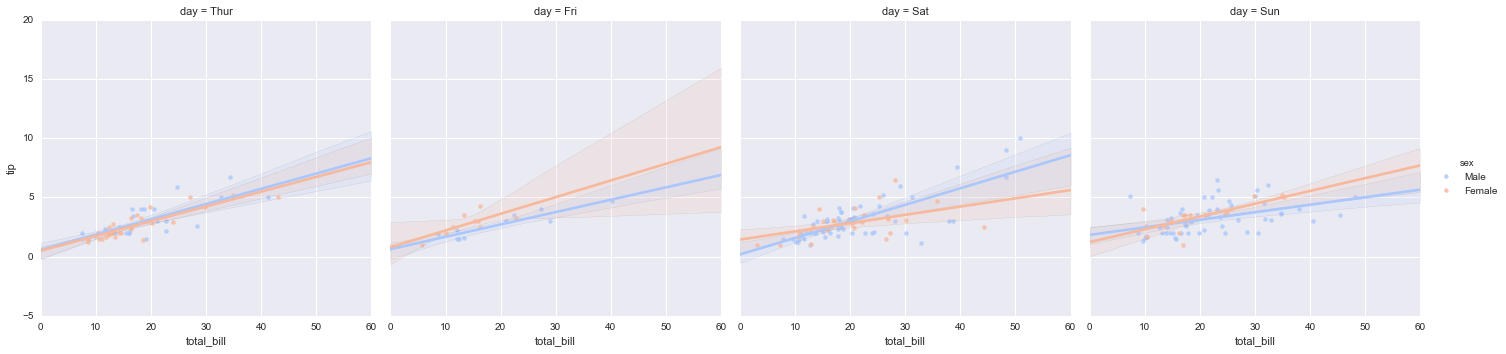

In [24]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm')

## Aspect and Size

Seaborn figures can have their size and aspect ratio adjusted with the **size** and **aspect** parameters:

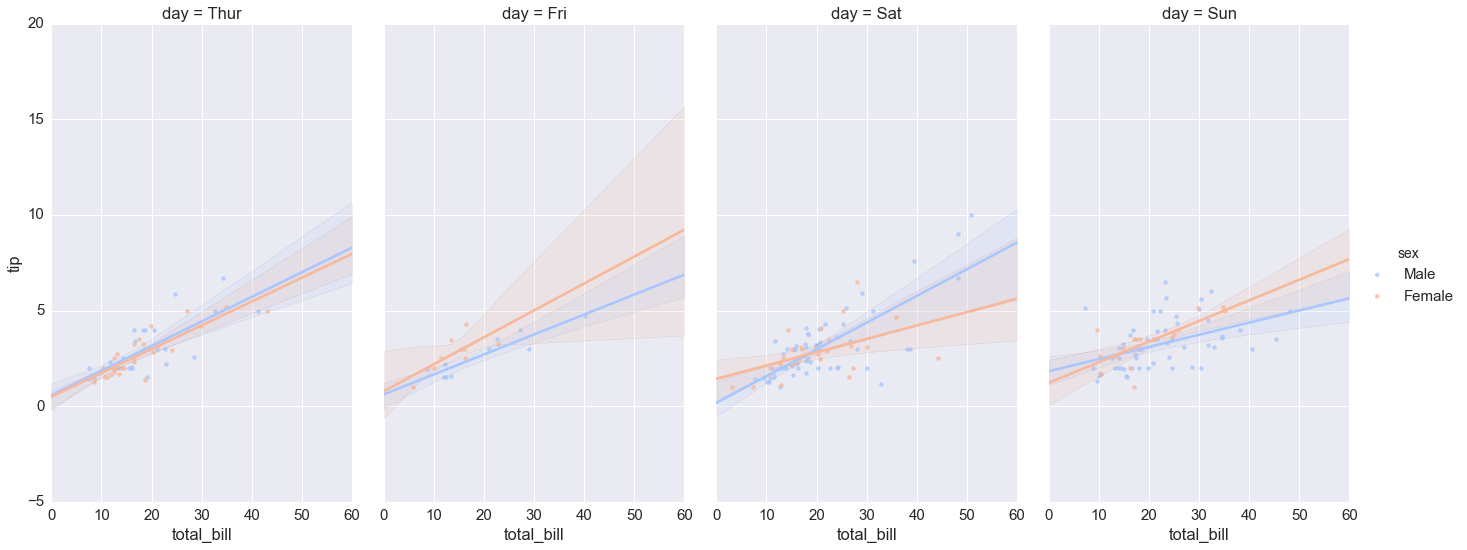

In [36]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',palette='coolwarm',
          aspect=0.6,size=8)

You're probably wondering how to change the font size or control the aesthetics even more, check out the Style and Color Lecture and Notebook for more info on that!

# Style and Color

We've shown a few times how to control figure aesthetics in seaborn, but let's now go over it formally:

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
tips = sns.load_dataset('tips')

## Styles

You can set particular styles:

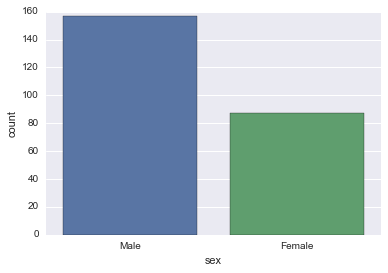

In [2]:
sns.countplot(x='sex',data=tips)

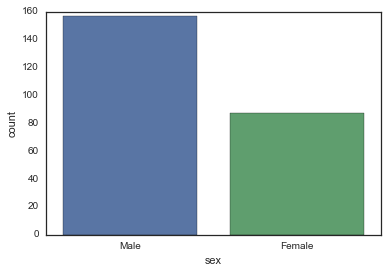

In [3]:
sns.set_style('white')
sns.countplot(x='sex',data=tips)

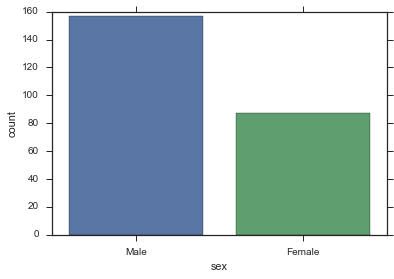

In [4]:
sns.set_style('ticks')
sns.countplot(x='sex',data=tips,palette='deep')

## Spine Removal

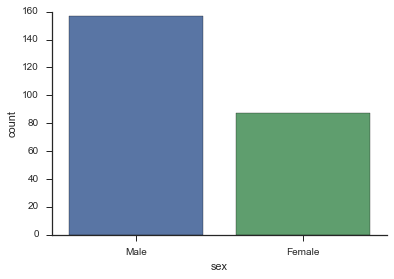

In [5]:
sns.countplot(x='sex',data=tips)
sns.despine()

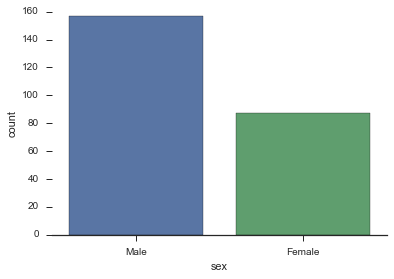

In [6]:
sns.countplot(x='sex',data=tips)
sns.despine(left=True)

## Size and Aspect

You can use matplotlib's **plt.figure(figsize=(width,height) ** to change the size of most seaborn plots.

You can control the size and aspect ratio of most seaborn grid plots by passing in parameters: size, and aspect. For example:

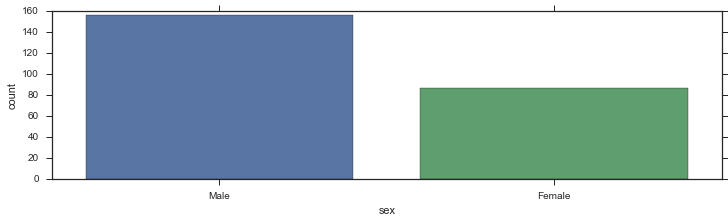

In [11]:
# Non Grid Plot
plt.figure(figsize=(12,3))
sns.countplot(x='sex',data=tips)

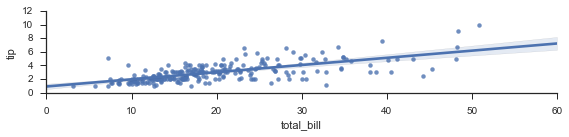

In [13]:
# Grid Type Plot
sns.lmplot(x='total_bill',y='tip',size=2,aspect=4,data=tips)

## Scale and Context

The set_context() allows you to override default parameters:

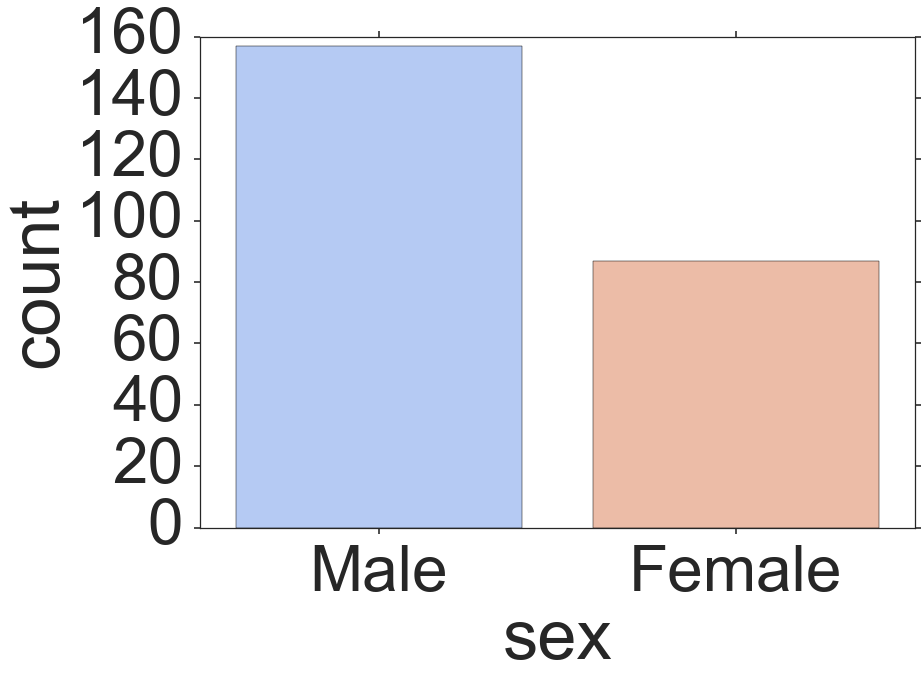

In [17]:
sns.set_context('poster',font_scale=4)
sns.countplot(x='sex',data=tips,palette='coolwarm')

Check out the documentation page for more info on these topics:
https://stanford.edu/~mwaskom/software/seaborn/tutorial/aesthetics.html

In [15]:
sns.puppyplot()

/Users/marci/anaconda/lib/python3.5/site-packages/bs4/__init__.py:166: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

To get rid of this warning, change this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


# Great Job!